In [1]:
from sklearn.datasets import load_digits , load_wine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 



In [2]:
data = load_digits()


In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [5]:
df.shape

(1797, 65)

In [6]:
data = df.drop('target', axis='columns')
target = df.target


In [7]:
print(data.shape)
print(target.shape)


(1797, 64)
(1797,)


8


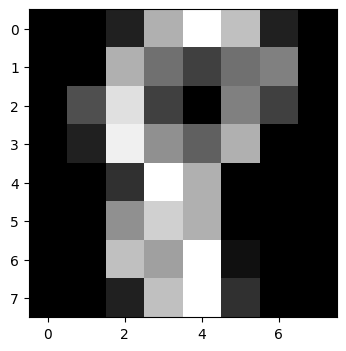

In [8]:
#reshape the data vector into 8X8 matrix and display the image
plt.figure(figsize=(20, 4))
index = 284
plt.imshow(np.array(data.iloc[index]).reshape(8, 8), cmap='gray')
print(target[index])

# 2d Visulatization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standartized_data = scaler.fit_transform(data)
print(standartized_data.shape)
# standartized_data = data 

(1797, 64)


In [10]:
#find the covariance matrix which is A^T * A
covar_matrix = np.matmul(standartized_data.T, standartized_data)
print(covar_matrix.shape)


(64, 64)


In [11]:
# get the top two eigen values and eigen vectors
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, subset_by_index=[62, 63])
print("Shape of eigen vectors = ", vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ", vectors.shape)


Shape of eigen vectors =  (64, 2)
Updated shape of eigen vectors =  (2, 64)


In [12]:
modified_data = np.matmul(vectors , standartized_data.T)
print(f"The shape of the new data point is {vectors.shape} X { standartized_data.T.shape} = {modified_data.shape}")

The shape of the new data point is (2, 64) X (64, 1797) = (2, 1797)


In [13]:
new_data = np.vstack((modified_data, target)).T
print(new_data.shape)


(1797, 3)


In [14]:
#creating dataframe for the given data for visualization 
df = pd.DataFrame(new_data, columns=["1st_principal", "2nd_principal", "target"])
print(df.head())


   1st_principal  2nd_principal  target
0       0.954502       1.914214     0.0
1      -0.924636       0.588980     1.0
2       0.317189       1.302039     2.0
3       0.868772      -3.020770     3.0
4       1.093480       4.528949     4.0


<Figure size 1000x1000 with 0 Axes>

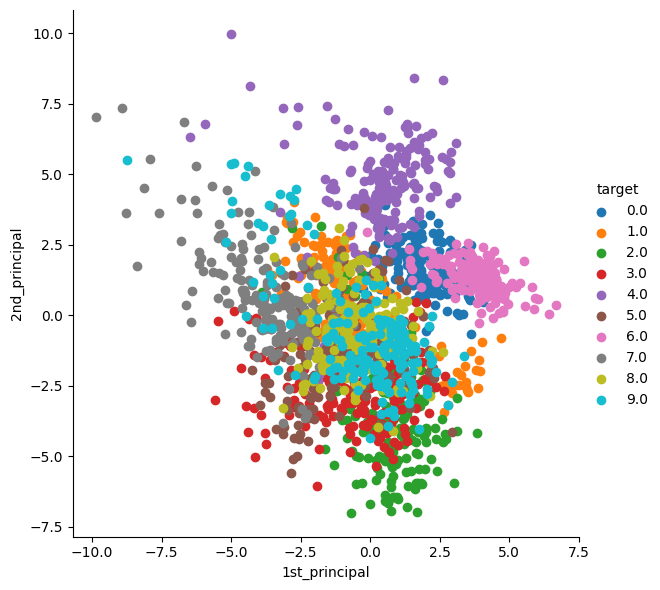

In [15]:
#plot a 2d scatter plot using matplotlib
plt.figure(figsize=(10, 10))
import seaborn as sns
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


In [16]:
#Number of PCA components required to explain 95% of the variance in the data
values, vectors = eigh(covar_matrix)
var = 0 
for i in range(63,0,-1):
    var += values[i]/sum(values)
    if var >= 0.99:
        break

print(f"It requires {63-i+1} PCA components to explain 99% of the variance in the data.")



It requires 54 PCA components to explain 99% of the variance in the data.


# PCA using sci-kit learn


In [17]:
from sklearn.decomposition import PCA 

n_components = 2 
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data)


In [18]:
all_data = np.vstack((pca_result.T, target)).T
df = pd.DataFrame(all_data, columns=["1st_principal", "2nd_principal", "target"])

<Figure size 1000x1000 with 0 Axes>

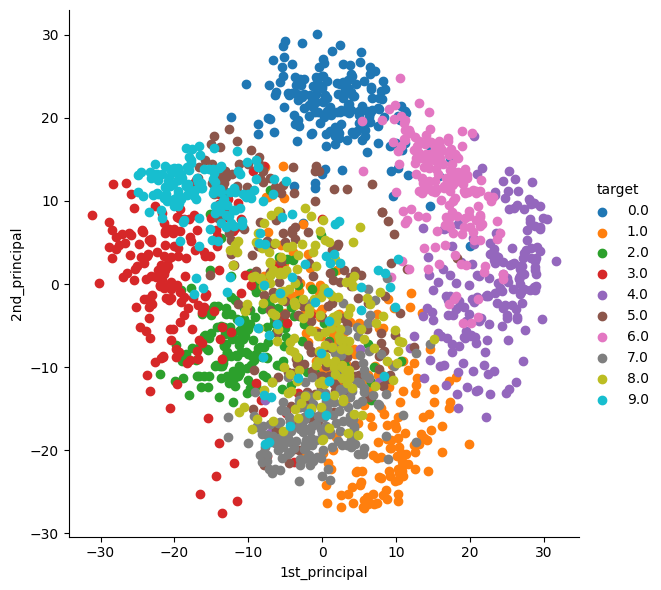

In [19]:
plt.figure(figsize=(10, 10))
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [20]:
# PCA for data without standartization without using sklearn

sample_data = data
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of the covariance matrix = ", covar_matrix.shape)


The shape of the covariance matrix =  (64, 64)


C:\Users\Ankush\AppData\Local\Temp\ipykernel_4548\4142389829.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  covar_matrix = np.matmul(sample_data.T, sample_data)


# PCA on Wine dataset 

In [21]:
wine = load_wine()


In [22]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [23]:
data = wine.data
target = wine.target

In [24]:
df = pd.DataFrame(data, columns=wine.feature_names)

In [25]:
df['target'] = target

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standartized_data = scaler.fit_transform(data)


In [27]:
cov_mat = np.matmul(standartized_data.T , standartized_data)
cov_mat.shape

(13, 13)

In [28]:
from scipy.linalg import eigh

value , vector = eigh(cov_mat , subset_by_index=[13-2 , 13-1])
vector = vector.T
print("The shape of the vector is ", vector.shape)


The shape of the vector is  (2, 13)


In [29]:
standartized_data.shape

(178, 13)

In [30]:
transformed_data = np.matmul(vector , standartized_data.T)
print("The shape of the transformed data is ", transformed_data.shape)

The shape of the transformed data is  (2, 178)


In [31]:
new_data = np.vstack((transformed_data , target)).T
print("The shape of the final data is ", new_data.shape)

The shape of the final data is  (178, 3)


In [32]:
df = pd.DataFrame(new_data , columns=["PC1" , "PC2" , "target"])

<Figure size 1000x1000 with 0 Axes>

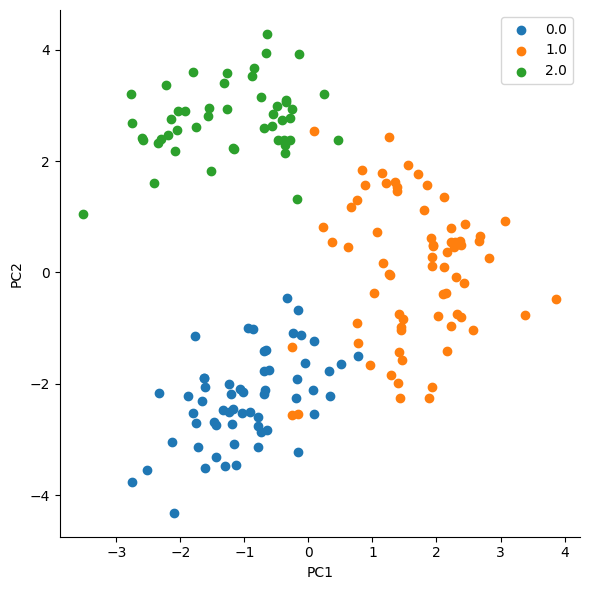

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.FacetGrid(df , hue="target" , height=6).map(plt.scatter , "PC1" , "PC2")
#set the legend to true 
plt.legend()
plt.show()

# Train a simple model based on the data that we have in the above graph .


In [35]:
def model(PC1 , PC2):
    #if pc1 < 1 and  PC2 < 0 then it belongs to class 0
    if PC1 < 1 and PC2 < 0:
        return 0
    #if pc1 > 1 and PC2 < 2 then it belongs to class 1
    elif PC1 > 1 and PC2 < 2:
        return 1
    #if pc1 < 1 and PC2 >0 then it belongs to class 2
    else:
        return 2

df['predicted'] = df.apply(lambda x : model(x['PC1'] , x['PC2']) , axis=1)  

In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['target'] , df['predicted'])

In [39]:
accuracy

0.9157303370786517

Hence using PCA we can create a simple model using if else conditions to classify the data into different classes with very high accuracy.

# Failure Cases of PCA